[*********************100%%**********************]  1 of 1 completed
2024-04-25 10:33:38.294698: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-25 10:33:38.440261: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-25 10:33:38.468427: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-04-25 10:33:38.468466: I te

Epoch 1/100
102/102 [==============================] - 1s 1ms/step - loss: 0.2492 - accuracy: 0.5370
Epoch 2/100
102/102 [==============================] - 0s 2ms/step - loss: 0.2483 - accuracy: 0.5429
Epoch 3/100
102/102 [==============================] - 0s 1ms/step - loss: 0.2480 - accuracy: 0.5459
Epoch 4/100
102/102 [==============================] - 0s 1ms/step - loss: 0.2478 - accuracy: 0.5449
Epoch 5/100
102/102 [==============================] - 0s 1ms/step - loss: 0.2475 - accuracy: 0.5518
Epoch 6/100
102/102 [==============================] - 0s 1ms/step - loss: 0.2474 - accuracy: 0.5410
Epoch 7/100
102/102 [==============================] - 0s 1ms/step - loss: 0.2470 - accuracy: 0.5587
Epoch 8/100
102/102 [==============================] - 0s 1ms/step - loss: 0.2466 - accuracy: 0.5528
Epoch 9/100
102/102 [==============================] - 0s 1ms/step - loss: 0.2462 - accuracy: 0.5558
Epoch 10/100
102/102 [==============================] - 0s 1ms/step - loss: 0.2463 - accura

/tmp/ipykernel_15337/2839788082.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_AAPL['y_pred'] = np.NaN
/tmp/ipykernel_15337/2839788082.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_price_AAPL['Tomorrows Returns'] = 0.
/tmp/ipykernel_15337/2839788082.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

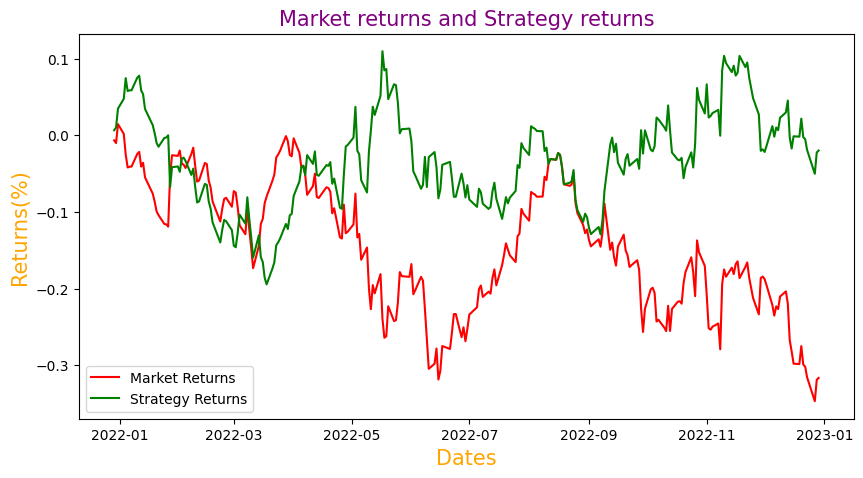

In [1]:
#############################################################################################################
    #Copyright (c) 2023, 2024 , Prof. Radhamadhab Dalai, ITER , Siksha O Aanusandhan University
    #Odisha, India,
    #Author's email address :  radhamadhabdalai@soa.ac.in
 ############################################################################################################

import numpy as np
import pandas as pd
import talib
import yfinance as yf

# Setting the random seed to a fixed number
import random
# Setting the random seed to a fixed number

import random
random.seed(42)
# Download the price data of Apple from November 2019 to January 2023
# Set the ticker as 'AAPL' and specify the start and end dates
price_AAPL= yf.download('AAPL', start='2017-11-06', end='2023-01-03', auto_adjust = True)

# Preparing the dataset
price_AAPL['H-L'] = price_AAPL['High'] - price_AAPL['Low']
price_AAPL['O-C'] = price_AAPL['Close'] - price_AAPL['Open']
price_AAPL['3day MA'] = price_AAPL['Close'].shift(1).rolling(window = 3).mean()
price_AAPL['10day MA'] = price_AAPL['Close'].shift(1).rolling(window = 10).mean()
price_AAPL['30day MA'] = price_AAPL['Close'].shift(1).rolling(window = 30).mean()
price_AAPL['Std_dev']= price_AAPL['Close'].rolling(5).std()
price_AAPL['RSI'] = talib.RSI(price_AAPL['Close'].values, timeperiod = 9)
price_AAPL['Williams %R'] = talib.WILLR(price_AAPL['High'].values, price_AAPL['Low'].values, price_AAPL['Close'].values, 7)


price_AAPL['Price_Rise'] = np.where(price_AAPL['Close'].shift(-1) > price_AAPL['Close'], 1, 0)


price_AAPL = price_AAPL.dropna()


X = price_AAPL.iloc[:, 4:-1]
y = price_AAPL.iloc[:, -1]


# Splitting the dataset
split = int(len(price_AAPL)*0.8)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

#Standardizing the dataset

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Building the Artificial Neural Network
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

classifier = Sequential()

classifier.add(Dense(units = 128, kernel_initializer = 'uniform'
, activation = 'relu', input_dim = X.shape[1]))

classifier.add(Dense(units = 128, kernel_initializer = 'uniform'
, activation = 'relu'))

classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])


classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)


# Predicting the movement of the stock
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

price_AAPL['y_pred'] = np.NaN
price_AAPL.iloc[(len(price_AAPL) - len(y_pred)):,-1:] = y_pred
trade_price_AAPL = price_AAPL.dropna()

# Computing Strategy Returns
trade_price_AAPL['Tomorrows Returns'] = 0.
trade_price_AAPL['Tomorrows Returns'] = np.log(trade_price_AAPL['Close']/trade_price_AAPL['Close'].shift(1))
trade_price_AAPL['Tomorrows Returns'] = trade_price_AAPL['Tomorrows Returns'].shift(-1)

trade_price_AAPL['Strategy Returns'] = 0.
trade_price_AAPL['Strategy Returns'] = np.where(trade_price_AAPL['y_pred'] == True, 
trade_price_AAPL['Tomorrows Returns'], - trade_price_AAPL['Tomorrows Returns'])

trade_price_AAPL['Cumulative Market Returns'] = np.cumsum(trade_price_AAPL['Tomorrows Returns'])
trade_price_AAPL['Cumulative Strategy Returns'] = np.cumsum(trade_price_AAPL['Strategy Returns'])

# Plotting the graph of returns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(trade_price_AAPL['Cumulative Market Returns'], color='r', label='Market Returns')
plt.plot(trade_price_AAPL['Cumulative Strategy Returns'], color='g', label='Strategy Returns')

plt.title('Market returns and Strategy returns', color='purple', size=15)

# Setting axes labels for close prices plot
plt.xlabel('Dates', {'color': 'orange', 'fontsize':15})
plt.ylabel('Returns(%)', {'color': 'orange', 'fontsize':15})

plt.legend()
plt.show()

